# Plots

In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

os.makedirs('plots', exist_ok=True)
os.makedirs('plots/all_impl', exist_ok=True)

store = True

/Users/maxkleinegger/miniconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
from src.utils.plot_utils import load_and_prepare_data, enrich_df

final_df = load_and_prepare_data()
final_df = enrich_df(final_df)
display(final_df.head())

,threads,prefill_count,time,total_inserts,successful_inserts,total_deletes,successful_deletes,total_contains,successful_contains,total_operations,average_operations_per_thread,implementation_name,op_mix,range_type,runtime_in_sec
0,1,0,5.000000,1.320008e+06,656497.000000,1.199553e+06,604110.000000,9.485958e+06,4.767210e+06,1.200552e+07,[12005519.0],global_lock,101080,shared,5
1,2,0,5.000005,6.302227e+05,327454.333333,5.723097e+05,275180.000000,4.524174e+06,2.173543e+06,5.726706e+06,"[2616745.0, 3109961.0]",global_lock,101080,shared,5
2,4,0,5.000005,4.527413e+05,242807.666667,4.115387e+05,190460.000000,3.252586e+06,1.506694e+06,4.116866e+06,"[928363.3333333334, 1345346.6666666667, 936581...",global_lock,101080,shared,5
3,8,0,5.000017,3.924980e+05,214183.000000,3.562963e+05,161778.333333,2.822444e+06,1.283419e+06,3.571238e+06,"[831009.0, 1181096.3333333333, 53401.0, 700142...",global_lock,101080,shared,5
4,10,0,5.000024,3.881253e+05,212435.333333,3.527707e+05,160048.333333,2.793015e+06,1.264879e+06,3.533911e+06,"[42781.666666666664, 1139665.6666666667, 90185...",global_lock,101080,shared,5


In [ ]:
from src.utils.plot_utils import plot_throughput

op_mix = ['101080', '404020']
range_type = ['shared', 'disjoint']
runtime = [1, 5]

for op in op_mix:
    for rt in range_type:
        for r in runtime:
            plot_throughput(final_df, op, rt, r, store=store)

In [ ]:
from src.utils.plot_utils import plot_total_vs_successful_operations
implementation_name = ['fine_lock', 'global_lock', 'lock_free', 'sequential']
op_mix = ['101080', '404020']
range_type = ['shared', 'disjoint']
runtime_in_sec = [1, 5]

for impl in implementation_name:
    for op in op_mix:
        for range in range_type:
            for runtime in runtime_in_sec:
                plot_total_vs_successful_operations(final_df, impl, op, range, runtime, store=store)

In [ ]:
from src.utils.plot_utils import plot_total_vs_successful_operations_all_implementations

operations = [('Inserts', 'total_inserts', 'successful_inserts'),
              ('Removes', 'total_deletes', 'successful_deletes'),
              ('Contains', 'total_contains', 'successful_contains')]
op_mix = ['101080', '404020']
range_type = ['shared', 'disjoint']
runtime_in_sec = [1, 5]

for operation in operations:
    for op in op_mix:
        for range in range_type:
            for runtime in runtime_in_sec:
                plot_total_vs_successful_operations_all_implementations(final_df, operation, op, range, runtime, store=store)

In [ ]:
from src.utils.plot_utils import plot_success_ratio_all_implementations

operations = [('Inserts', 'total_inserts', 'successful_inserts'),
              ('Removes', 'total_deletes', 'successful_deletes'),
              ('Contains', 'total_contains', 'successful_contains')]
op_mix = ['101080', '404020']
range_type = ['shared', 'disjoint']
runtime_in_sec = [1, 5]

for operation in operations:
    for op in op_mix:
        for range in range_type:
            for runtime in runtime_in_sec:
                plot_success_ratio_all_implementations(final_df, operation, op, rt, r, store=store)

In [ ]:
from src.utils.plot_utils import plot_speedup_vs_sequential

op_mix = ['101080', '404020']
range_type = ['shared', 'disjoint']
runtime = [1, 5]

for op in op_mix:
    for rt in range_type:
        for r in runtime:
            plot_speedup_vs_sequential(final_df, op, rt, r, store=store)

/var/folders/5s/7wthnl510p9_gg2ytrfvxy180000gn/T/ipykernel_38620/2685339992.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels( [lbl.get_text() if i % 5 == 0 else "" for i, lbl in enumerate(ax.get_xticklabels())])


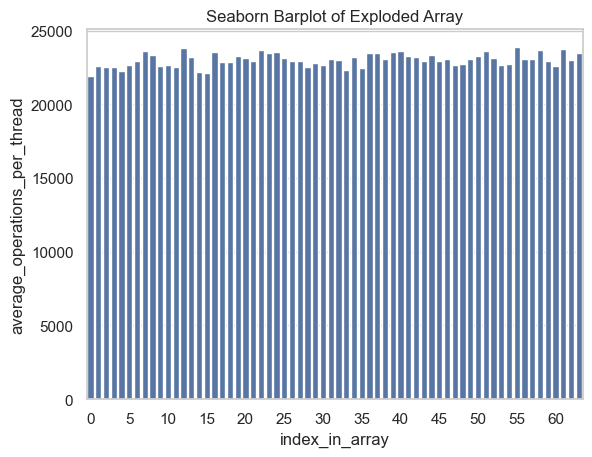

In [ ]:
import pandas as pd
import seaborn as sns

def explode_average_ops_per_thread(df, column='average_operations_per_thread'):
    # We'll keep track of a row_id so we know which original row each came from
    df = df.reset_index(drop=True).copy()
    exploded_rows = []

    for i, row in df.iterrows():
        arr = row[column]
        for j, val in enumerate(arr):
            # Make a copy of the row, but replace the array with a scalar
            exploded_row = row.copy()
            exploded_row['row_id'] = i
            exploded_row['index_in_array'] = j
            exploded_row[column] = val
            exploded_rows.append(exploded_row)

    return pd.DataFrame(exploded_rows)

# Example usage:
df_simple = final_df[
    (final_df['implementation_name'] == 'fine_lock') &
    (final_df['op_mix'] == '404020') &
    (final_df['range_type'] == 'shared') &
    (final_df['runtime_in_sec'] == 5) &
    (final_df['threads'] == 64)
].copy()

df_exploded = explode_average_ops_per_thread(df_simple, column='average_operations_per_thread')
ax = sns.barplot(
    data=df_exploded,
    x='index_in_array',
    y='average_operations_per_thread'
)
plt.title("Seaborn Barplot of Exploded Array")
ax.set_xticklabels( [lbl.get_text() if i % 5 == 0 else "" for i, lbl in enumerate(ax.get_xticklabels())])
plt.show()